In [49]:
using Plots, Printf, LaTeXStrings, DelimitedFiles, LinearAlgebra, CSV, DataFrames, Statistics

gr() 

# Load data
data2 = readdlm("vpsi_2.plt", skipstart=3)
theta2 = data2[:, 1]
r2 = data2[:, 2]
R2 = data2[:, 3]
Z2 = data2[:, 4]
vnorm2 = data2[:, 8];
vp2 = data2[:, 7];

data32 = readdlm("vpsi_3_ov_2.plt", skipstart=3)
theta32 = data32[:, 1]
r32 = data32[:, 2]
R32 = data32[:, 3]
Z32 = data32[:, 4]
vnorm32 = data32[:, 8];
vp32 = data32[:, 7];

# Load Big Psi data

# Read CSV file
bigpsi = CSV.read("NSTX_big_Psi.csv", DataFrame)  # Creates a DataFrame

# Extract first 3 columns into variables
Rbp = bigpsi[:, 1]  # First column
Zbp = bigpsi[:, 2]  # Second column
Ψ = bigpsi[:, 3];  # Third column

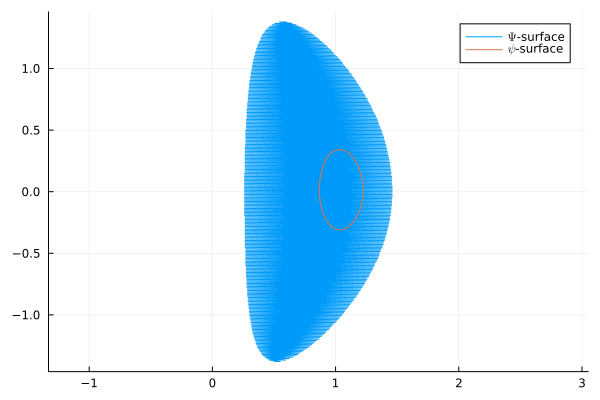

In [50]:
theme(:default)
plot(Rbp, Zbp, label=L"$\Psi$-surface")
plot!(R32, Z32, label=L"$\psi$-surface", aspect_ratio=:equal)

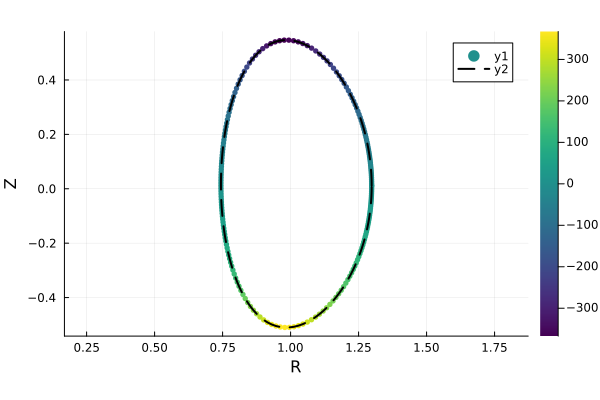

In [77]:
# Create scatter plot with color bar
scatter(R2, Z2, 
        marker_z = vnorm2,  # Values to map to colors
        color = :viridis,  # Color scheme
        markersize = 3,
        markerstrokewidth = 0,
        xlabel = "R", 
        ylabel = "Z",
        aspect_ratio=:equal)
plot!(R2, Z2, line=(2, :dash, :black),
    )

[ Info: Saved animation to /home/belster/JuliaFiles/PlasmaPlots/subtle_particle_trajectory.gif


Plots.AnimatedGif("/home/belster/JuliaFiles/PlasmaPlots/subtle_particle_trajectory.gif")
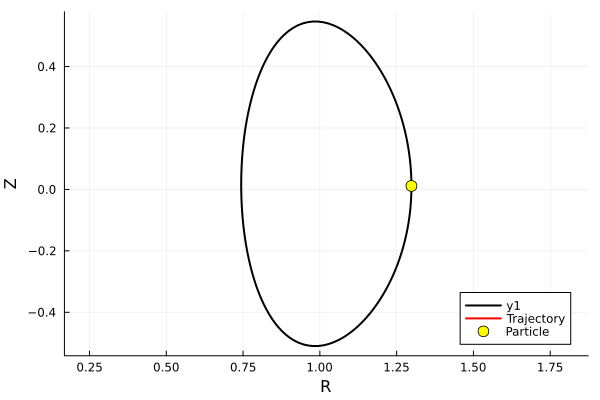

In [82]:
# Calculate normalized normal vectors (same as before)
function calculate_normals(R, Z)
    n = length(R)
    normals = Vector{Tuple{Float64,Float64}}(undef, n)
    
    for i in 1:n
        im1 = i == 1 ? n : i-1
        ip1 = i == n ? 1 : i+1
        
        dR = (R[ip1] - R[im1])/2
        dZ = (Z[ip1] - Z[im1])/2
        
        len = sqrt(dZ^2 + dR^2)
        nx = -dZ/len  # outward normal
        nz = dR/len    # outward normal
        
        normals[i] = (nx, nz)
    end
    return normals
end

# Calculate normals
normals = calculate_normals(R2, Z2)

# Adjust these parameters to control displacement visibility
displacement_scale = 0.02  # Much smaller scale for subtle effect
min_marker_size = 2        # Size for surface points
particle_marker_size = 6   # Size for particle marker

# Normalize vnorm for consistent displacement scaling
vnorm_normalized = vnorm2 ./ maximum(abs.(vnorm2))

# Create displaced positions (much more subtle now)
particle_R = R2 .+ displacement_scale .* vnorm_normalized .* [n[1] for n in normals]
particle_Z = Z2 .+ displacement_scale .* vnorm_normalized .* [n[2] for n in normals]

# Create animation showing subtle displacement
anim = @animate for i in 1:length(R2)
    p = plot(R2, Z2, 
            line=(2, :black, :solid),
            xlabel="R", ylabel="Z",
            aspect_ratio=:equal,
            #title="Particle Trajectory with Subtle Displacement",
            legend=:bottomright)
    
    # Plot the particle trajectory up to current point
    plot!(particle_R[1:i], particle_Z[1:i],
         line=(2, :red, :solid),
         label="Trajectory")
    
    # Highlight current particle position
    scatter!([particle_R[i]], [particle_Z[i]],
            color=:yellow,
            markersize=particle_marker_size,
            markerstrokecolor=:black,
            markerstrokewidth=1,
            label="Particle")
end

gif(anim, "subtle_particle_trajectory.gif", fps=15)

In [83]:
# Calculate normals (same as before)
normals = calculate_normals(R2, Z2)

# Calculate current displacements (before scaling)
raw_displacements = [norm(vnorm2[i] .* [normals[i][1], normals[i][2]]) for i in eachindex(R2)]

# Find the current maximum displacement
current_max_disp = maximum(raw_displacements)

# Calculate required scaling factor to make max displacement = 0.05 m
target_max_disp = 0.05  # 5 cm in meters
scaling_factor = target_max_disp / current_max_disp

# Apply this scaling to get properly scaled displacements
displacement_scale = scaling_factor  # Now this will give exactly 5 cm max displacement

# Create final displaced positions
particle_R = R2 .+ displacement_scale .* vnorm2 .* [n[1] for n in normals]
particle_Z = Z2 .+ displacement_scale .* vnorm2 .* [n[2] for n in normals]

# Verify the maximum displacement
actual_displacements = [norm([particle_R[i] - R2[i], particle_Z[i] - Z2[i]]) for i in eachindex(R2)]
println("Maximum displacement achieved: ", maximum(actual_displacements), " meters")

Maximum displacement achieved: 0.04999999999999999 meters


[ Info: Saved animation to /home/belster/JuliaFiles/PlasmaPlots/NSTX_simulated_trajectory_q2.gif


Plots.AnimatedGif("/home/belster/JuliaFiles/PlasmaPlots/NSTX_simulated_trajectory_q2.gif")
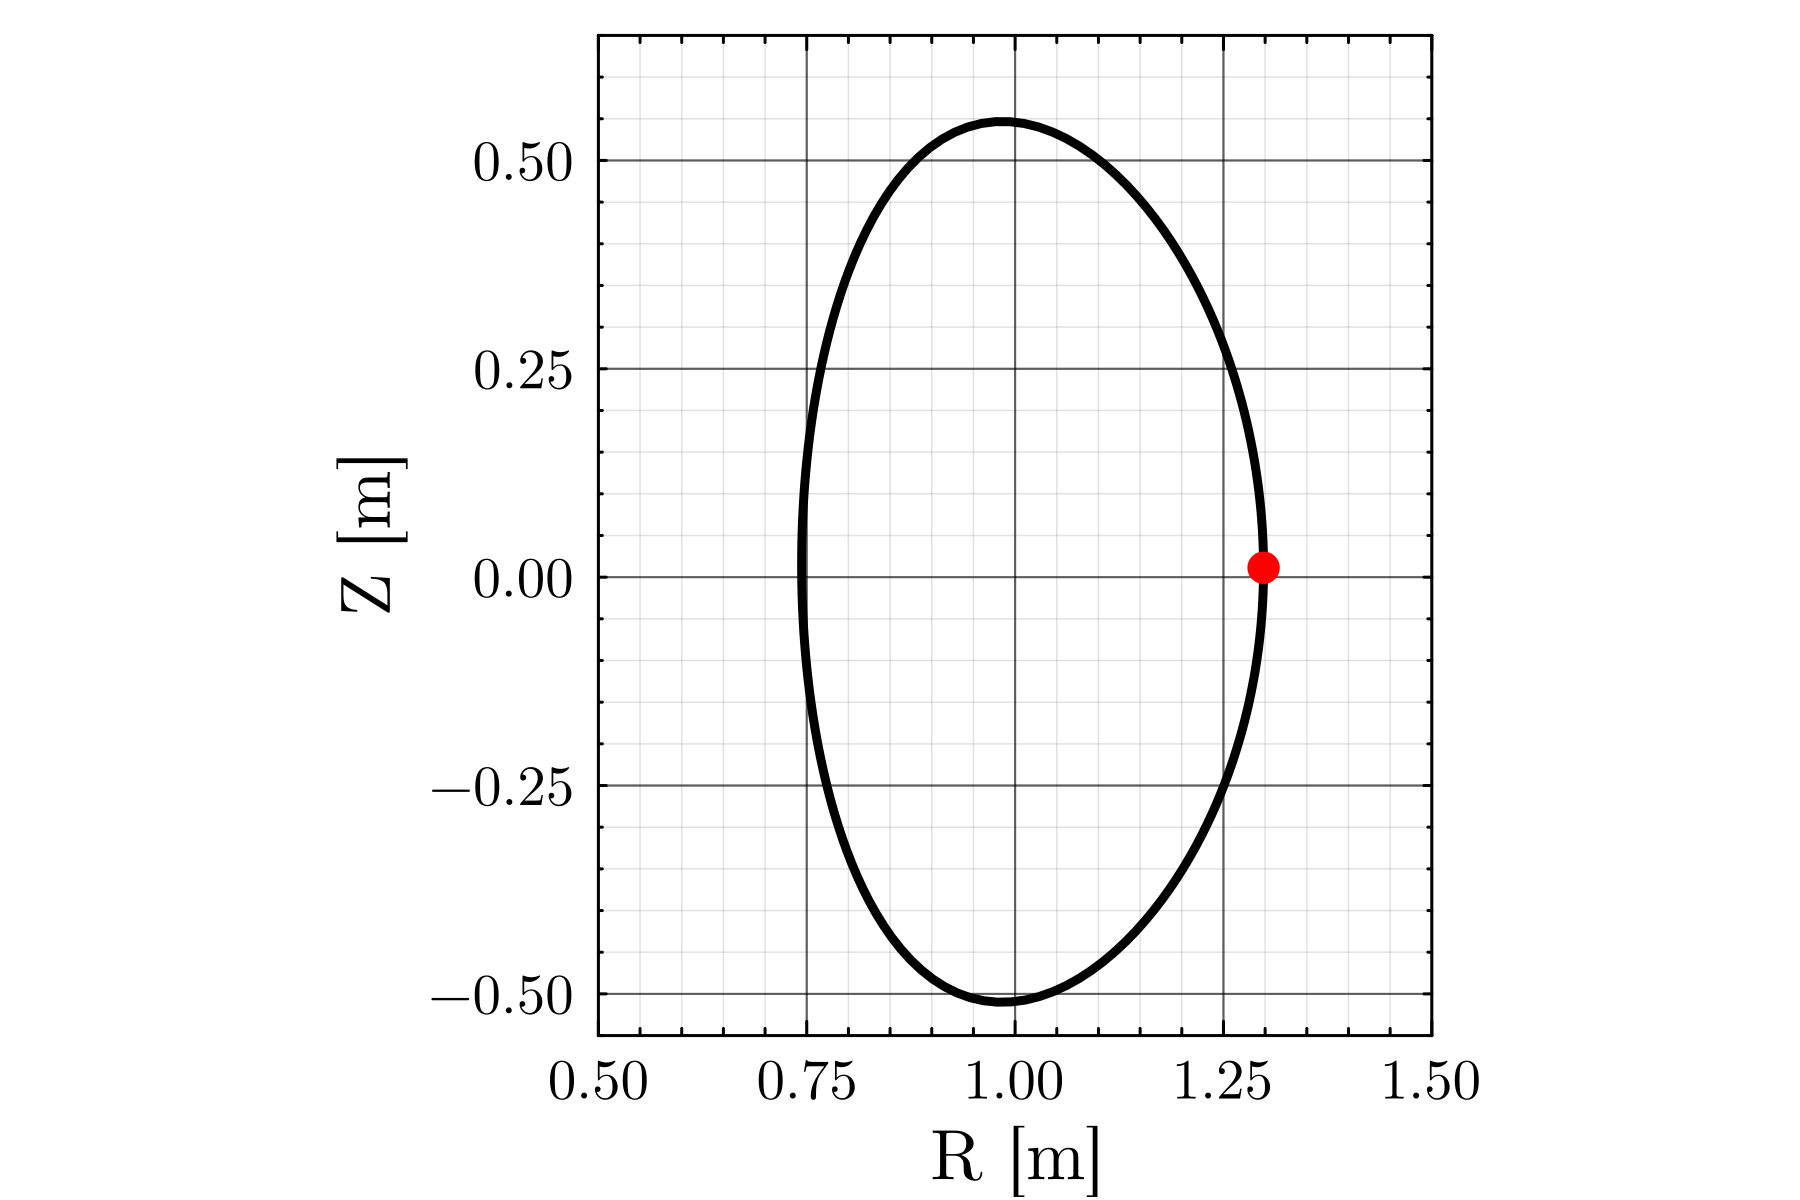

In [99]:
# Using the calculated displacement_scale from above
theme(:dao)
anim = @animate for i in 1:length(R2)
    p = 
    plot(R2, Z2, 
        line=(3, :black, :solid),
        xlabel="R [m]", ylabel="Z [m]",  # Added units
        aspect_ratio=:equal,
        label=L"$q=2/1$",
        ylims=(-0.55, 0.65),
        xlims=(0.5, 1.5)
        #title="Particle Trajectory (Max displacement: $(round(target_max_disp*100, digits=1)) cm)",)
    )
    
    # Trajectory line
    plot!(particle_R[1:i], particle_Z[1:i],
        line=(3, :red, :solid),
        label=nothing
        )
    
    # Current particle position
    scatter!([particle_R[i]], [particle_Z[i]],
        color=:red,
        markersize=6,
        #markerstrokecolor=:black,
        #markerstrokewidth=1,
        label=nothing, 
        legend=false, 
        titlefontsize=20,
        tickfontsize=12,
        legendfontsize=15,
        yguidefontsize=15,
        xguidefontsize=15,
        bottom_margin=1.5*Plots.mm, 
        dpi=300
        )
    
    # Add annotation showing current displacement
    #current_disp = norm([particle_R[i] - R2[i], particle_Z[i] - Z2[i]])
    #annotate!(particle_R[i], particle_Z[i], 
             #text("$(round(current_disp*100, digits=2)) cm", 8, :red, :left))
end

gif(anim, "NSTX_simulated_trajectory_q2.gif", fps=20)

In [ ]:
# Create the plot
#=
theme(:default)

# Optional: Add machine cross-section
scatter(Rbp, Zbp, 
    markersize=0.5, 
    markeralpha=0.1,
    markercolor=:lightgray,
    label="Flux Surfaces"
)

scatter!(R32, Z32, 
    zcolor = vnorm32,          # Color by velocity
    markersize = 3,          # Point size
    markerstrokewidth = 0,   # No border
    color = :balance
    )

scatter!(R2, Z2, 
    zcolor = vnorm2,          # Color by velocity
    markersize = 3,          # Point size
    markerstrokewidth = 0,   # No border
    colorbar_title = L"$v_{\psi} \ [m/s]$",    # Colorbar label
    color = :balance,        # Colormap
    aspect_ratio = :equal,   # Maintain proportions
    xlabel = L"$R \ [m]$",
    ylabel = L"$Z \ [m]$",
    # title = L"Velocity ($v_{\psi}$) on Flux Surface",
    titlefontsize=15,
    tickfontsize=10,
    legendfontsize=8,
    yguidefontsize=15,
    xguidefontsize=15,
    colorbar_titlefontsize=15,
    xlims=(minimum(Rbp)-0.05, maximum(Rbp)+0.05),
    # grid = true,
    legend = :false,
    size = (600, 500), # Adjust figure dimensions
    left_margin = 5Plots.mm,  # Reduce left margin
    right_margin = 5Plots.mm, # Reduce right margin
    bottom_margin = 5Plots.mm, # Reduce bottom margin
    top_margin = 5Plots.mm, # Reduce top margin, 
    colorbar_title_location = :right,  # Moves label to the right
    colorbar_title_padding = 10,  # Fine-tune label position
    dpi = 300
    )
# savefig("NSTX_2surf.png")
=#

In [ ]:
theme(:default)
plot(theta2*(180/pi), vnorm2, lw=4)
plot!(theta32*(180/pi), vnorm32, lw=4)
# savefig("NSTX_vnorm.png")

In [ ]:
theme(:dao)
plot(theta2*(180/pi), vnorm2, lw=4, label=L"$q=2/1$")
plot!(theta32*(180/pi), vnorm32, lw=4, label=L"$q=3/2$",
    xlabel=L"$\theta$ [deg]",
    ylabel=L"$v_{\psi}$ [m/s]",
    xlims=(0,360),
    legend=:best,
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=15,
    yguidefontsize=15,
    xguidefontsize=15,
    left_margin=2.5*Plots.mm
    )
# savefig("NSTX_vnorm.png")

In [ ]:
plot(R2, vp2, lw=2, label=L"$q=2/1$")
plot!(R32, vp32, lw=2, label=L"$q=3/2$",
    xlabel=L"$R$ [m]",
    ylabel=L"$v_{\theta}$ [m/s]",
    # xlims=(0,360),
    legend=:best,
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=15,
    yguidefontsize=15,
    xguidefontsize=15,
    left_margin=2.5*Plots.mm, 
    dpi = 300
    )
# savefig("NSTX_vp_v1.png")

In [ ]:
# Define the grid
#=
Q = range(0.0, 2, length=5000)  # Higher resolution
U = range(0.0, 1, length=5000)

# Create region matrix
region_matrix = zeros(length(U), length(Q))

for (i,u) in enumerate(U), (j,q) in enumerate(Q)
    # Test each condition independently without overlap
    if (u^(-1/2) ≤ u^(-1) ≤ q^(-1/2)) && (u^(-1/2) ≤ u^(-1) ≥ q^(1/2))
        region_matrix[i,j] = 1 # CF 1
    elseif (u^(-1/2) ≤ u^(-1) ≤ q^(1/2))
        region_matrix[i,j] = 2  # NCF 1
    elseif (u^(-1/3) ≤ u^(-1/2) ≤ q^(-1/2) ≤ u^(-1)) && 
          (u^(-1/3) ≤ u^(-1/2) ≥ q^(1/2) ≤ u^(-1))
        region_matrix[i,j] = 3  # CF 2
    elseif (u^(-1/3) ≤ u^(-1/2) ≤ q^(1/2) ≤ u^(-1))
        region_matrix[i,j] = 4 # NCF 2
    elseif (u^(-1/4) ≤ u^(-1/3) ≤ q^(-1/2) ≤ u^(-1/2)) && 
          (u^(-1/4) ≤ u^(-1/3) ≥ q^(1/2) ≤ u^(-1/2))
        region_matrix[i,j] = 5  # CF 3
    elseif (u^(-1/4) ≤ u^(-1/3) ≤ q^(1/2) ≤ u^(-1/2))
        region_matrix[i,j] = 6  # NCF 3
    elseif (u ≤ q^(3/2) ≤ q^(-1/2))
        region_matrix[i,j] = 7  # test1
    elseif (u ≤ q^(-3/2) ≤ q^(1/2))
        region_matrix[i,j] = 8  # test2
    end
end

# Plot with discrete colors
colors = palette(:okabe_ito, 8)
labels = ["CF 1", "NCF 1", "CF 2", "NCF 2", "CF 3", "NCF 3", "CF 4", "NCF 4"]

plt = heatmap(Q, U, region_matrix,
            c=colors, colorbar=false,
            xlabel=L"$Q$", ylabel=L"$U$",
            # title="Region Plot", 
            legend=:bottomright, 
            titlefontsize=20,
            tickfontsize=12,
            legendfontsize=10,
            yguidefontsize=15,
            xguidefontsize=15,
            # left_margin=2.5*Plots.mm, 
            dpi = 300)

# Add legend manually (Plots.jl doesn't handle heatmap legends well)
for (i, (color, label)) in enumerate(zip(colors, labels))
    scatter!([NaN], [NaN], mc=color, label=label, markersize=8)
end

display(plt)
# savefig("parameterspaceplotUQ.png")
=#